### Importing the modules

In [2]:
# For loading and manipulating data & one hot encoding
import pandas as pd 

# For calculating mean and standard deviation
import numpy as np

# For using XGBoost
import xgboost as xgb

# For splitting data into training and test sets
from sklearn.model_selection import train_test_split

# For scoring, creating and plotting a confusion matrix
from sklearn.metrics import balanced_accuracy_score,roc_auc_score,make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# For cross validation
from sklearn.model_selection import GridSearchCV



### Import data

In [6]:
df = pd.read_csv('Telco_customer_churn.csv')

In [7]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


 The last 4 columns contain exit interview info and therefore should not be used for prediction.

In [8]:
df.drop(['Churn Label','Churn Score','CLTV','Churn Reason'],axis = 1, inplace =True )

# axis = 1 - to remove columns
# axis = 0 - to remove rows 
# inplace = true means you don not have to create a copy of the dataframe, it will modify the existing dataframe

In [10]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [11]:
# Iterate over all column names of Dataframe
for col in df.columns:
    # Select the column by name and get count of unique values in it
    count = df[col].nunique()
    print('Count of Unique values in Column ', col, ' is : ', count)

Count of Unique values in Column  CustomerID  is :  7043
Count of Unique values in Column  Count  is :  1
Count of Unique values in Column  Country  is :  1
Count of Unique values in Column  State  is :  1
Count of Unique values in Column  City  is :  1129
Count of Unique values in Column  Zip Code  is :  1652
Count of Unique values in Column  Lat Long  is :  1652
Count of Unique values in Column  Latitude  is :  1652
Count of Unique values in Column  Longitude  is :  1651
Count of Unique values in Column  Gender  is :  2
Count of Unique values in Column  Senior Citizen  is :  2
Count of Unique values in Column  Partner  is :  2
Count of Unique values in Column  Dependents  is :  2
Count of Unique values in Column  Tenure Months  is :  73
Count of Unique values in Column  Phone Service  is :  2
Count of Unique values in Column  Multiple Lines  is :  3
Count of Unique values in Column  Internet Service  is :  3
Count of Unique values in Column  Online Security  is :  3
Count of Unique v

We can drop the following columns,

Count, country and state since they have just 1 unique value

CustomerID since it is not helpful for classification

LatLong since there are seperate columns for lat and long

In [12]:
df.drop(['Count','Country','State','CustomerID','Lat Long'],axis = 1, inplace =True )
df.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


### Identifying Missing Data

In [13]:
df.dtypes

City                  object
Zip Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Value            int64
dtype: object

In [17]:
# Iterate over all column names of Dataframe
for col in df.columns:
    # Select the column by name and get unique values in it
    print(col, ': ', df[col].unique())
    print()

City :  ['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Standish' 'Tulelake'
 'Olympic Valley']

Zip Code :  [90003 90005 90006 ... 96128 96134 96146]

Latitude :  [33.964131 34.059281 34.048013 ... 40.346634 41.813521 39.191797]

Longitude :  [-118.272783 -118.30742  -118.293953 ... -120.386422 -121.492666
 -120.212401]

Gender :  ['Male' 'Female']

Senior Citizen :  ['No' 'Yes']

Partner :  ['No' 'Yes']

Dependents :  ['No' 'Yes']

Tenure Months :  [ 2  8 28 49 10  1 47 17  5 34 11 15 18  9  7 12 25 68 55 37  3 27 20  4
 58 53 13  6 19 59 16 52 24 32 38 54 43 63 21 69 22 61 60 48 40 23 39 35
 56 65 33 30 45 46 62 70 50 44 71 26 14 41 66 64 29 42 67 51 31 57 36 72
  0]

Phone Service :  ['Yes' 'No']

Multiple Lines :  ['No' 'Yes' 'No phone service']

Internet Service :  ['DSL' 'Fiber optic' 'No']

Online Security :  ['Yes' 'No' 'No internet service']

Online Backup :  ['Yes' 'No' 'No internet service']

Device Protection :  ['No' 'Yes' 'No internet service']

Tech Support :  ['N

In [18]:
df.isna().sum()

City                 0
Zip Code             0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Value          0
dtype: int64

Total Charges should be a float value but is set to object type. Let's investigate !

In [21]:
#df['Total Charges'] = pd.to_numeric(df['Total Charges'])
# This statement gives an error : Unable to parse string " "

Check how many records have missing data

In [23]:
len(df.loc[df['Total Charges']==' '])

11

Since only 11 rows have missing values, we can analyze further.

In [26]:
df.loc[df['Total Charges']==' ']

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
2234,San Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0
2568,San Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0
4331,Los Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0
4687,Sun City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
5104,Ben Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0
5719,La Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0


### Replacing the missing data

We can observe that the total charges are missing since the number of tenure months are zero for every record. So it makes sense to impute these missing values to 0.

In [29]:
df.loc[(df['Total Charges'] == ' '),'Total Charges'] = 0

To verify we will look at those records where Tenure months = 0

In [30]:
df.loc[df['Tenure Months'] == 0]

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
2234,San Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,0
2568,San Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,0
4331,Los Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,0
4687,Sun City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,0
5104,Ben Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,0
5719,La Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0,0


In [31]:
# Converting it to numeric now
df['Total Charges'] = pd.to_numeric(df['Total Charges'])

In [33]:
df.dtypes

City                  object
Zip Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges        float64
Churn Value            int64
dtype: object

### Split the data into dependent and independent variables  

Split data into 2 parts 
1. The columns of data used to make classifications
2. The column of data we want to predict (Churn Value)

By default, pandas uses copy by reference. Copy function is used to ensure that the orignal data <mark>df_no_missing</mark> is not modified when we modify X or Y.

In [38]:
X = df.drop('Churn Value',axis=1).copy()
y = df['Churn Value'].copy()

In [39]:
X.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50
3,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05
4,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30


In [40]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn Value, dtype: int64

### One-Hot Encoding

In [41]:
df.dtypes

City                  object
Zip Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges        float64
Churn Value            int64
dtype: object

So **Latitude, Longitude,Monthly Charges and Total Charges** are <mark>float64</mark>. The rest of them are of object type. While XGBoost can support continuous data, it cannot support categorical data. Therefore, in order to use XGBoost we have to convert categorical data into multiple columns of binary values. This is called **One-Hot Encoding.**

#### Why One-Hot Encoding?

If we just converted these categories to numbers, XGBoost will treat each number as a seperate category that is no more or less similar to any of the other categories. 

#### How do we do this ?

1. ColumnTransformer():
                - from scikit-learn
                - creates a persistent function that can validate data that you can get in the future
                - turns data into array and loses column names making it harder to verify that your usage of ColumnTransformer() works as intended
                
2. get_dummies():
                - from pandas
                - leaves data into dataframes and retains the column names
                - does not have persistent behavior


In [42]:
X_encoded = pd.get_dummies(X, columns =['City',
                                        'Gender',
                                        'Senior Citizen',
                                        'Partner', 
                                        'Dependents',         
                                        'Phone Service',
                                        'Multiple Lines',       
                                        'Internet Service',      
                                       'Online Security',       
                                        'Online Backup',         
                                        'Device Protection',     
                                       'Tech Support',          
                                        'Streaming TV',         
                                        'Streaming Movies',      
                                       'Contract',              
                                        'Paperless Billing',     
                                        'Payment Method'])
X_encoded.head()

,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,City_Acampo,City_Acton,City_Adelanto,City_Adin,...,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,90003,33.964131,-118.272783,2,53.85,108.15,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,90005,34.059281,-118.307420,2,70.70,151.65,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,90006,34.048013,-118.293953,8,99.65,820.50,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
3,90010,34.062125,-118.315709,28,104.80,3046.05,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
4,90015,34.039224,-118.266293,49,103.70,5036.30,0,0,0,0,...,1,1,0,0,0,1,1,0,0,0


Verifying whether y contains only binary values

In [43]:
y.unique()

array([1, 0])

### Building an XGBoost model

Let's observe if dataset is imbalanced or not by dividing the number of people who left the company by total number of people in the datset.

In [44]:
sum(y)/len(y)

0.2653698707936959

Only 27 % of the people in the dataset left the company. Because of this, when we split the data into training and testing, we will split using stratification in order to maintain same percentage of people who left the company in both training and testing dataset.

In [68]:
from sklearn.preprocessing import LabelEncoder
#le=LabelEncoder()
df = df.apply(LabelEncoder().fit_transform)

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X_encoded,y,random_state = 42,stratify =y)

In [70]:
sum(y_train)/len(y_train)

0.2654297614539947

In [71]:
sum(y_test)/len(y_test)

0.26519023282226006

### Method 1 : 
Using early stopping to stop building trees when they no longer improve the function.

In [72]:
clf = xgb.XGBClassifier(objective='binary:logistic',missing = None,seed =42)


- binary:logistic XGBoost uses a logistic regression approach to evaluate how good a classifier is
- missing = None - what character we are using to represent missing values
- seed = 42

- clf consists of Xtreme Gradient Boosted trees
- early_stopping_rounds = 10 - if after 10 rounds there is no change in accuracy then it will stop
- evaluates how many trees to build using the testing data set

In [73]:
clf.fit(X_train,
        y_train,
        verbose = False,
        early_stopping_rounds =10,
        eval_metric='aucpr',
        eval_set = [(X_test,y_test)])

/Users/shreyahunur/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

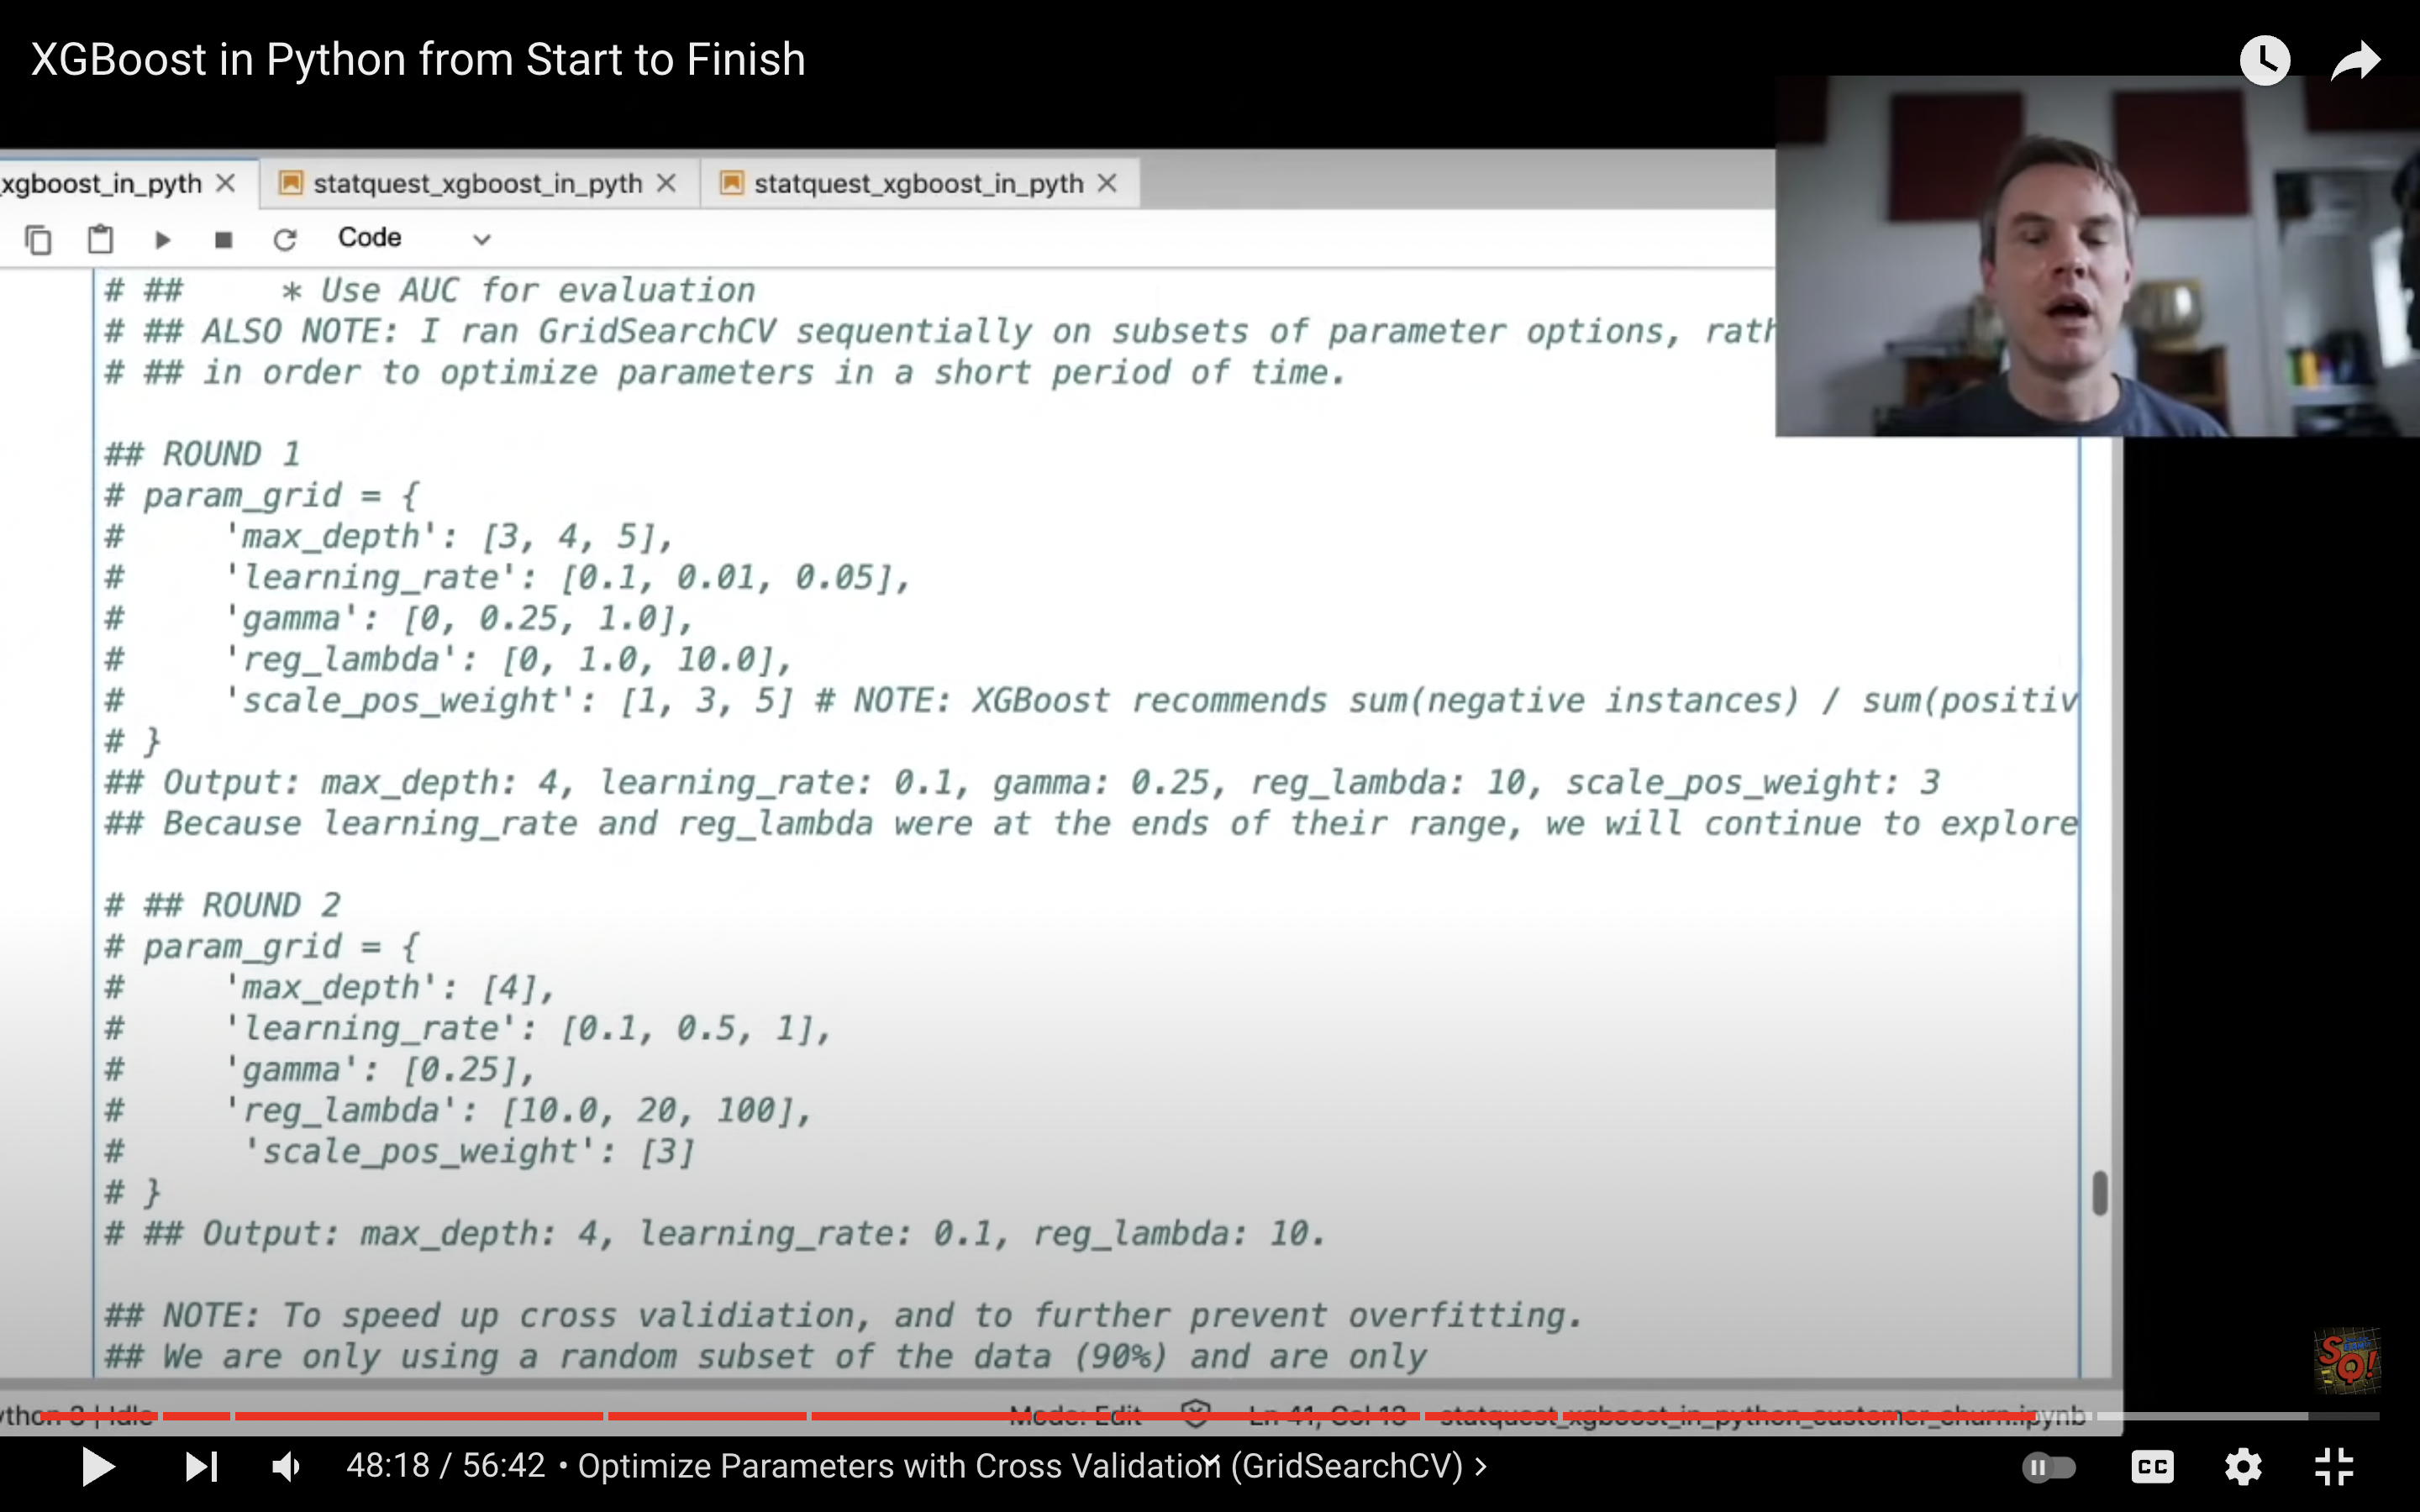

In [85]:
clf_xgb = xgb.XGBClassifier(seed = 42,
                            objective='binary:logistic',
                            gamma = 0.25,
                            learn_rate = 0.1,
                            max_depth = 4,
                            reg_lambda = 10,
                            scale_pos_weight = 3,
                            subsample = 0.9,
                            colsample_bytree = 0.5)
clf_xgb.fit(X_train,
        y_train,
        verbose = True,
        early_stopping_rounds =10,
        eval_metric='aucpr',
        eval_set = [(X_test,y_test)])

[14:51:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "learn_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-aucpr:0.55001
[1]	validation_0-aucpr:0.57244
[2]	validation_0-aucpr:0.61286
[3]	validation_0-aucpr:0.61941
[4]	validation_0-aucpr:0.64853
[5]	validation_0-aucpr:0.65112
[6]	validation_0-aucpr:0.64206
[7]	validation_0-aucpr:0.64882
[8]	validation_0-aucpr:0.65727
[9]	validation_0-aucpr:0.65918
[10]	validation_0-aucpr:0.65802
[11]	validation_0-aucpr:0.66230
[12]	validation_0-aucpr:0.66943
[13]	validation_0-aucpr:0.66864
[14]	validation_0-aucpr:0.67189
[15]	validation_0-aucpr:0.67644
[16]	validation_0-aucpr:0.67674
[17]	validation_0-aucpr:0.67907
[18]	val

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0.25, gpu_id=-1,
              importance_type=None, interaction_constraints='', learn_rate=0.1,
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=10, scale_pos_weight=3,
              seed=42, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [86]:
y_pred = clf_xgb.predict(X_test)

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [77]:
pred = model.predict(X_test)

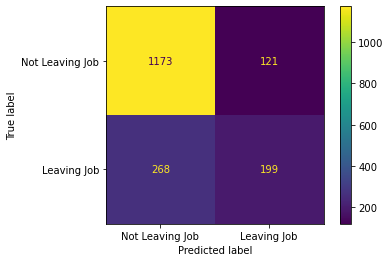

In [80]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,pred)
dis = ConfusionMatrixDisplay(cm,display_labels=["Not Leaving Job","Leaving Job"])
dis.plot()

/Users/shreyahunur/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


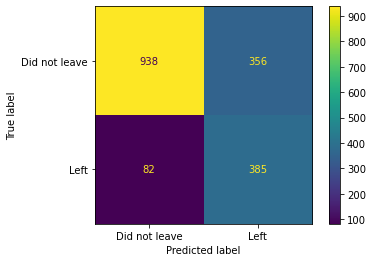

In [87]:
plot_confusion_matrix(clf_xgb,
                      X_test,
                      y_test,
                      values_format='d',
                      display_labels=["Did not leave","Left"]
                     )



In [ ]:
cmx = confusion_matrix(y_test,pred)
dis = ConfusionMatrixDisplay(cmx,display_labels=["Not Leaving Job","Leaving Job"])
dis.plot()